In [ ]:
import requests
from PIL import Image, ImageDraw, ImageFont
from io import BytesIO

In [ ]:
subscription_key = ''
face_api_url = 'https://labuser1face.cognitiveservices.azure.com/face/v1.0/detect'

#Class, Library, Package 대문자 관례
#지역변수, 파라메타 소문자로 관례
#addr, msg 줄임말은 배제
#두 단어가 합쳐지면 두번째 단어는 대문자
#상수는 전체가 대문자   ex)const MAX_USER=100

image_url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTJhNfkBAcPR2vvc19-I6_dwA9ciUkxISMgWA&usqp=CAU'

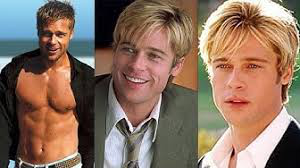

In [ ]:
image = Image.open(BytesIO(requests.get(image_url).content))
image

In [ ]:
headers = {'Ocp-Apim-Subscription-Key': subscription_key}

In [ ]:
params ={
    'returnFaceId': 'false',                #인식된 사람 얼굴마다 ID부여하고 그 ID값을 받아냄
    'returnFaceLandmarks':'false',         #얼굴내 랜드마크에 대한 정보를 보여줄껀지
    'returnFaceAttributes':'Smile'    #대략적인 나이와 성별
}

In [ ]:
data = {'url': image_url}

In [ ]:
response = requests.post(face_api_url, params=params, headers=headers, json=data)
faces = response.json()
faces

[{'faceRectangle': {'top': 46, 'left': 199, 'width': 75, 'height': 75},
  'faceAttributes': {'smile': 0.002}},
 {'faceRectangle': {'top': 35, 'left': 109, 'width': 58, 'height': 58},
  'faceAttributes': {'smile': 1.0}}]

In [ ]:
draw = ImageDraw.Draw(image)

In [ ]:
def DrawBox(faces):

  for face in faces:
    rect = face['faceRectangle']
    left = rect['left']
    top = rect['top']
    width = rect['width']
    height = rect['height']

    draw.rectangle(((left,top),(left+width,top+height)), outline='red')

    face_attributes = face['faceAttributes']
    smile = face_attributes['smile']
    draw.text((left,top),str(smile), fill='red')

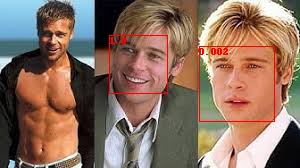

In [ ]:
DrawBox(faces)
image